In [133]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

# Accessing My Google Drive
drive.mount('/content/drive')  # access my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [137]:
target_size=(256,256) #provided by network resizing

In [138]:
# used to zoom in , zoom out , rescale , positioning
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [139]:
#ba2sm el swar w b7dd el directory bt3o w b7dd el batch size 

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Egyptian Currency',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Egyptian Currency', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 611 images belonging to 7 classes.
Found 148 images belonging to 7 classes.


In [140]:
train_generator.image_shape # bcheck 3la el shape

(256, 256, 3)

In [141]:
train_generator.class_indices #bcheck 3la el classes el training

{'Fifty': 0,
 'Five': 1,
 'Hundred': 2,
 'One': 3,
 'Ten': 4,
 'Twenty': 5,
 'TwoHundred': 6}

In [142]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), #convulotion layer #32 is the number of feacture extracted
                 activation='relu',
                 input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
  
    
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(64, activation='relu'), #fully connected layer
    tf.keras.layers.Dropout(rate=0.5),
     tf.keras.layers.Dense(7, activation='softmax')
])

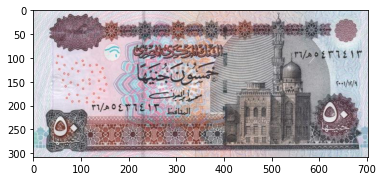

In [143]:
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Egyptian Currency/Fifty/50 front.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Egyptian Currency/Fifty/50 front.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [144]:
EPOCHS = 30          #iteration
INIT_LR = 1e-3          #learning rate
BS = 32               #batch size

In [145]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [146]:
model.summary() #used in documentation

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [147]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/20
9/9 [==============================] - 33s 4s/step - loss: 0.5837 - accuracy: 0.1755 - val_loss: 0.4436 - val_accuracy: 0.1419
Epoch 2/20
9/9 [==============================] - 22s 3s/step - loss: 0.5058 - accuracy: 0.1536 - val_loss: 0.4283 - val_accuracy: 0.1419
Epoch 3/20
9/9 [==============================] - 21s 2s/step - loss: 0.4787 - accuracy: 0.1408 - val_loss: 0.4108 - val_accuracy: 0.2703
Epoch 4/20
9/9 [==============================] - 21s 2s/step - loss: 0.4433 - accuracy: 0.2309 - val_loss: 0.3815 - val_accuracy: 0.2365
Epoch 5/20
9/9 [==============================] - 21s 2s/step - loss: 0.4185 - accuracy: 0.3126 - val_loss: 0.3689 - val_accuracy: 0.2635
Epoch 6/20
9/9 [==============================] - 22s 2s/step - loss: 0.4233 - accuracy: 0.2614 - val_loss: 0.3522 - val_accuracy: 0.3514
Epoch 7/20
9/9 [==============================] - 26s 3s/step - loss: 0.4070 - accuracy: 0.2834 - val_loss: 0.3449 - val_accuracy: 0.4122
Epoch 8/20
9/9 [==================

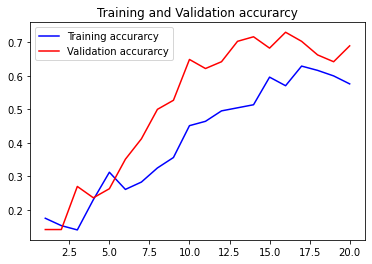

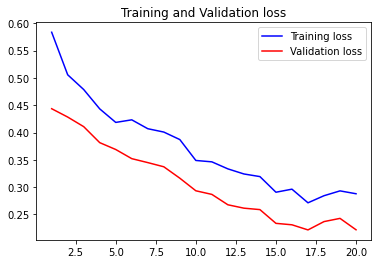

In [148]:
import matplotlib
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [149]:
from keras.models import load_model
model.save('Egyptiancurrency.h5')

In [150]:
model.save_weights('Egyptiancurrency.h5')


In [151]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes
     

{'Fifty': 0,
 'Five': 1,
 'Hundred': 2,
 'One': 3,
 'Ten': 4,
 'Twenty': 5,
 'TwoHundred': 6}

In [154]:
Classes = ["50 L.E","5 L.E","100 L.E","1 L.E","10 L.E","20 L.E","200 L.E"]

1/1 [==============================] - 0s 67ms/step
class : 200 L.E EGP


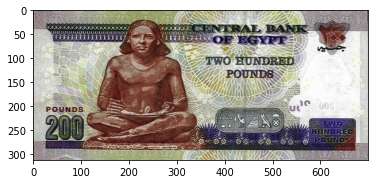

In [155]:
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
img_width=256
img_height=256
from tensorflow.keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
result = model.predict([prepare('/content/drive/MyDrive/Egyptian Currency/TwoHundred/200 back.jpg')])
currency=image.load_img('/content/drive/MyDrive/Egyptian Currency/TwoHundred/200 back.jpg')
plt.imshow(currency)
print ("class : "+Classes[np.argmax(result)]+" EGP")

1/1 [==============================] - 0s 67ms/step
class : 20 L.E EGP


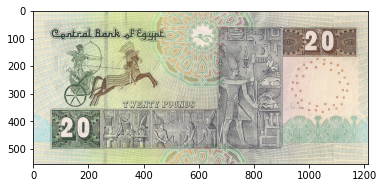

In [162]:
import numpy as np
import matplotlib.pyplot as plt


# Pre-Processing test data same as train data.
img_width=256
img_height=256

from tensorflow.keras.preprocessing import image


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/Egyptian Currency/Twenty/20 back.jpg')])
currency=image.load_img('/content/drive/MyDrive/Egyptian Currency/Twenty/20 back.jpg')
plt.imshow(currency)
print ("class : "+Classes[np.argmax(result)]+" EGP")

1/1 [==============================] - 0s 28ms/step
class : 10 L.E EGP


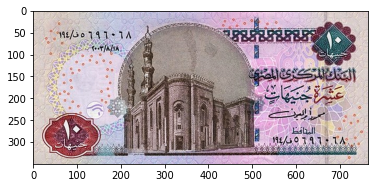

In [157]:
import numpy as np
import matplotlib.pyplot as plt


# Pre-Processing test data same as train data.
img_width=256
img_height=256

from tensorflow.keras.preprocessing import image


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/Egyptian Currency/Ten/10 front.jpg')])
currency=image.load_img('/content/drive/MyDrive/Egyptian Currency/Ten/10 front.jpg')
plt.imshow(currency)
print ("class : "+Classes[np.argmax(result)]+" EGP")

1/1 [==============================] - 0s 18ms/step
class : 5 L.E EGP


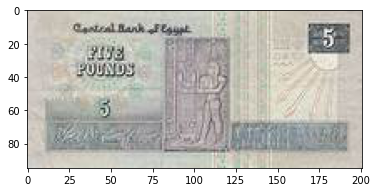

In [158]:
import numpy as np
import matplotlib.pyplot as plt


# Pre-Processing test data same as train data.
img_width=256
img_height=256

from tensorflow.keras.preprocessing import image


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/Egyptian Currency/Five/Five 33.jpg')])
currency=image.load_img('/content/drive/MyDrive/Egyptian Currency/Five/Five 33.jpg')
plt.imshow(currency)
print ("class : "+Classes[np.argmax(result)]+" EGP")

1/1 [==============================] - 0s 17ms/step
class : 100 L.E EGP


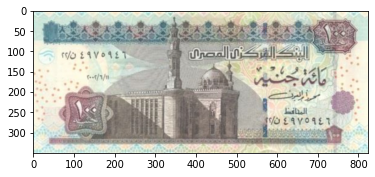

In [159]:
import numpy as np
import matplotlib.pyplot as plt


# Pre-Processing test data same as train data.
img_width=256
img_height=256

from tensorflow.keras.preprocessing import image


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/Egyptian Currency/Hundred/100 front.jpg')])
currency=image.load_img('/content/drive/MyDrive/Egyptian Currency/Hundred/100 front.jpg')
plt.imshow(currency)
print ("class : "+Classes[np.argmax(result)]+" EGP")

1/1 [==============================] - 0s 17ms/step
class : 10 L.E EGP


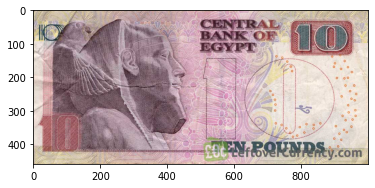

In [160]:
import numpy as np
import matplotlib.pyplot as plt


# Pre-Processing test data same as train data.
img_width=256
img_height=256

from tensorflow.keras.preprocessing import image


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/Egyptian Currency/Ten/Ten 11.jpg')])
currency=image.load_img('/content/drive/MyDrive/Egyptian Currency/Ten/Ten 11.jpg')
plt.imshow(currency)
print ("class : "+Classes[np.argmax(result)]+" EGP")

1/1 [==============================] - 0s 17ms/step
class : 50 L.E EGP


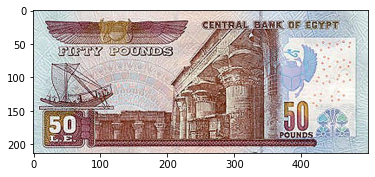

In [161]:
import numpy as np
import matplotlib.pyplot as plt


# Pre-Processing test data same as train data.
img_width=256
img_height=256

from tensorflow.keras.preprocessing import image


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/Egyptian Currency/Fifty/Fifty 20.jpg')])
currency=image.load_img('/content/drive/MyDrive/Egyptian Currency/Fifty/Fifty 20.jpg')
plt.imshow(currency)
print ("class : "+Classes[np.argmax(result)]+" EGP")